First 5 rows of dataset:
    Size Location  Number of Rooms   Price
0  1460    rural                4  211600
1  1894    rural                1  232844
2  1730    rural                1  207393
3  1695    urban                2  323343
4  2238    rural                4  295190

Missing values:
 Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64


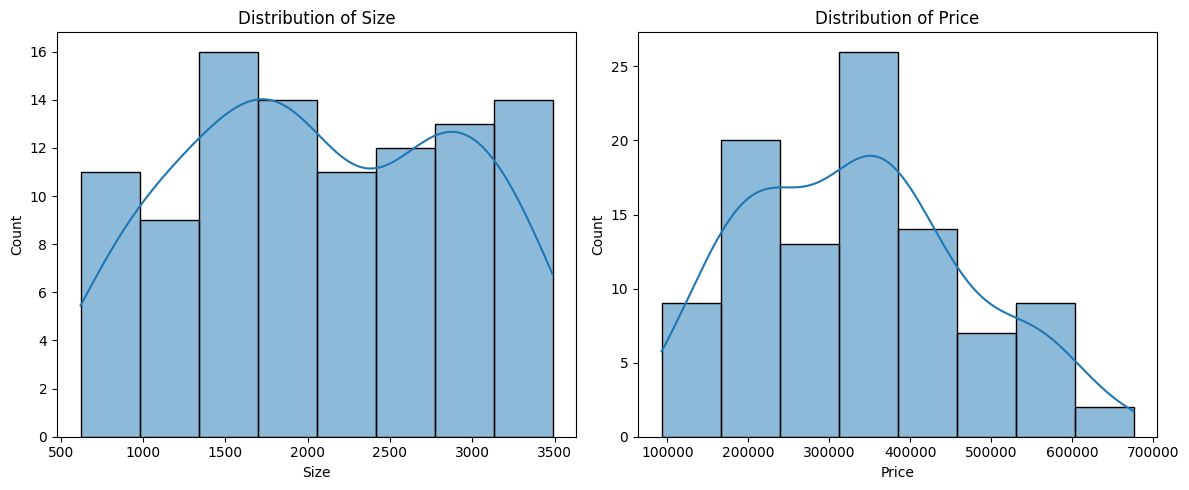

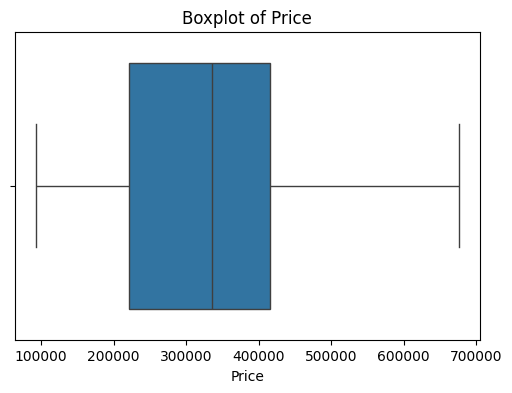

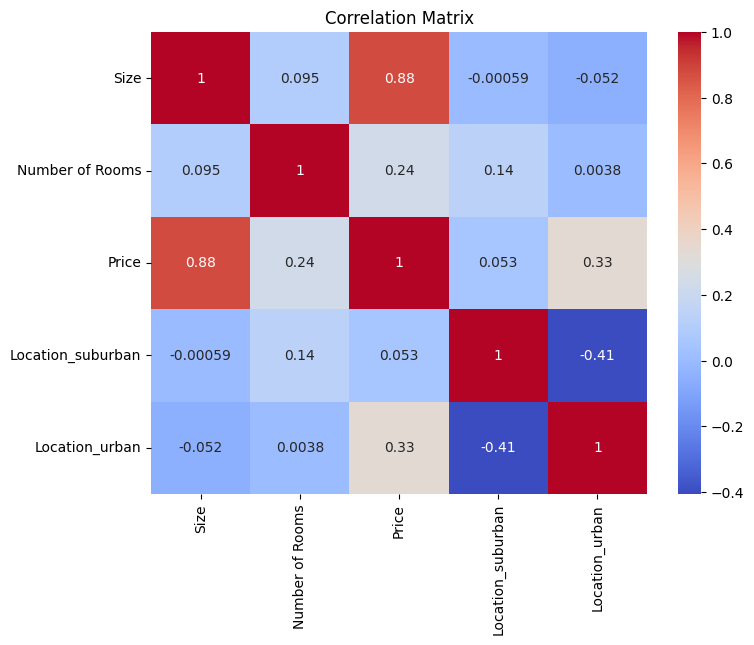


Train size: (80, 4), Test size: (20, 4)

Model Evaluation:
Root Mean Squared Error (RMSE): 16941.16
R² Score: 0.975

Sample Predictions:
    Actual      Predicted
0  318616  332943.590562
1  250718  257314.458426
2  373314  384819.341415
3  382151  414857.949821
4  363053  369636.372563


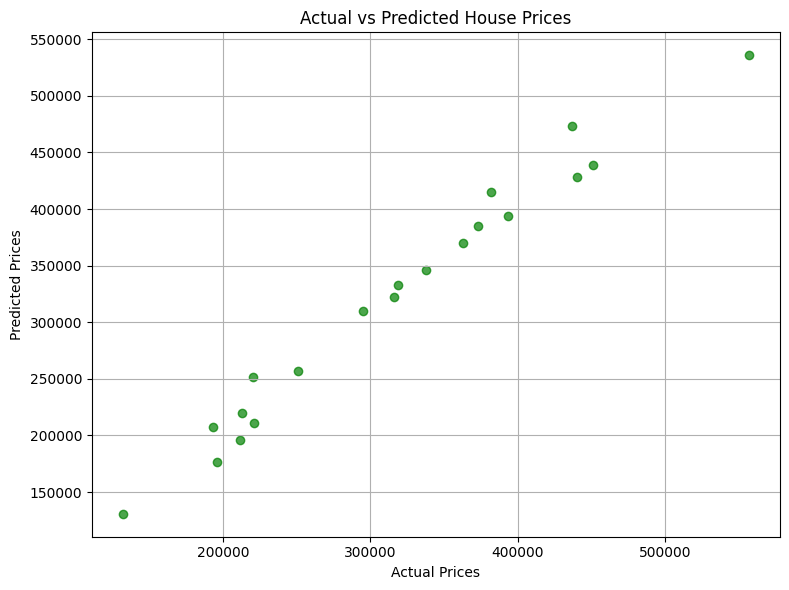

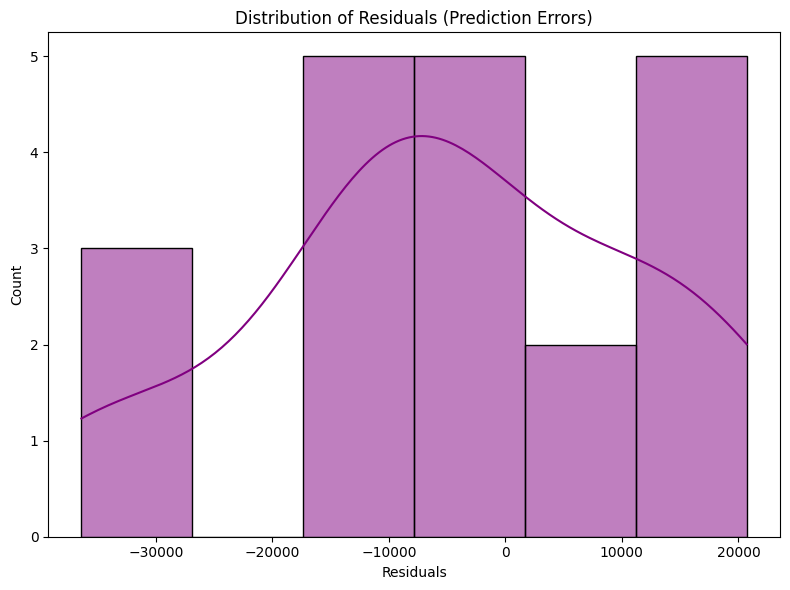

In [3]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load Dataset
df = pd.read_csv('house_prices.csv')
print("First 5 rows of dataset:\n", df.head())

# 2. Check for missing values
print("\nMissing values:\n", df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)  # Fill numeric NaNs with mean
df.dropna(inplace=True)  # Drop any remaining rows with missing values

# 3. Analyze numerical distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Size'], kde=True)
plt.title('Distribution of Size')

plt.subplot(1, 2, 2)
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.tight_layout()
plt.show()

# 4. Check for outliers using boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Price'])
plt.title("Boxplot of Price")
plt.show()

# 5. Normalize numerical data
scaler = MinMaxScaler()
df[['Size', 'Number of Rooms']] = scaler.fit_transform(df[['Size', 'Number of Rooms']])

# 6. Encode categorical features (One-Hot Encoding for 'Location')
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

# 7. Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 8. Feature and Target Separation
X = df.drop('Price', axis=1)
y = df['Price']

# 9. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTrain size: {X_train.shape}, Test size: {X_test.shape}")

# 10. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 11. Predict on Test Data
y_pred = model.predict(X_test)

# 12. Evaluate the Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Root Mean Squared Error (RMSE):", round(rmse, 4))
print("R² Score:", round(r2, 4))

# 13. Show Predicted vs Actual
result_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\nSample Predictions:\n", result_df.head())

# 14. Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

# 15. Residuals Distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Distribution of Residuals (Prediction Errors)")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()